## Machine Learning with Scikit-Learn
Link: https://www.linkedin.com/learning/machine-learning-with-scikit-learn/effective-machine-learning-with-scikit-learn?autoplay=true

### Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Load Dataset

In [3]:
data = load_iris()
#data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
#df.head()

In [19]:
#df['species'].value_counts()

In [5]:
df = df[df.species != 2]

### Remove Missing values or Impute values

In [6]:
# Check whether there are any null or missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [7]:
# We can either remove missing values or fill them with mean, zeroes etc.

# Remove entire rows from dataframe if they contain any nans in them 
df = df.dropna(how = 'any')
## OR
# Fill missing values with mean, zeroes etc with fillna() method
df = df.fillna(0)

### Splitting data into Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "species"], df.species, random_state=3, train_size = 0.8, stratify = df.species)
#stratify is used in classification for having same proportion of 1's and 0's in both test and train

### Standardize the data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [9]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

#### Create Instance

In [10]:
# Make a logistic regression instance
clf = LogisticRegression()

#### Train model

In [11]:
# Training the model
clf.fit(X_train,y_train)

LogisticRegression()

#### Predict

In [12]:
# Predict for few observations
print('prediction', clf.predict(df.loc[0:0, df.columns != "species"]))
print('probability', clf.predict_proba(df.loc[0:0, df.columns != "species"]))

prediction [1]
probability [[0.09758832 0.90241168]]


In [13]:
# Predictions for test data
pd.DataFrame({"prob" :clf.predict_proba(X_test)[:,1], "pred": clf.predict(X_test), "actual":y_test})

,prob,pred,actual
60,0.969776,1,1
96,0.973105,1,1
57,0.895898,1,1
49,0.020124,0,0
3,0.021880,0,0
51,0.989503,1,1
10,0.013779,0,0
42,0.010998,0,0
24,0.019896,0,0
41,0.132328,0,0


#### Model Performance

Accuracy

In [14]:
score = clf.score(X_test, y_test)
print(score)

1.0


Confusion matrix

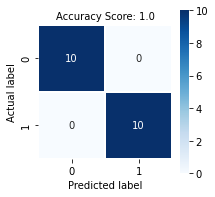

In [15]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 10);
plt.xlabel('Predicted label', fontsize = 10);
plt.title('Accuracy Score: {}'.format(score), size = 10);
plt.tick_params(labelsize= 10)

In [16]:
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])  

In [17]:
modified_cm

[['TN = 10', 'FP = 0'], ['FN = 0', 'TP = 10']]

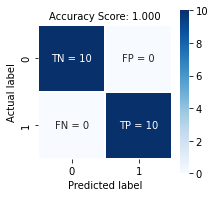

In [18]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = [0, 1],
            yticklabels = [0, 1],
            );

plt.ylabel('Actual label', fontsize = 10);
plt.xlabel('Predicted label', fontsize = 10);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 10);
plt.tick_params(labelsize= 10)

Precision, Recall and F1 score

In [19]:
print("precision", metrics.precision_score(y_test, clf.predict(X_test))) # TP / TP+FP
print("recall", metrics.recall_score(y_test, clf.predict(X_test))) # TP / TP+FN
print("f1_score", metrics.f1_score(y_test, clf.predict(X_test))) # Harmonic mean of precision and recall 

precision 1.0
recall 1.0
f1_score 1.0


In [20]:
# Precision and Recall values for different thresholds (outputs precision, recall and threshold values)
metrics.precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]),
 array([0.89589792, 0.96977625, 0.97310488, 0.97810544, 0.98446812,
        0.98950334, 0.99537805, 0.9976167 , 0.99781761, 0.99839281]))

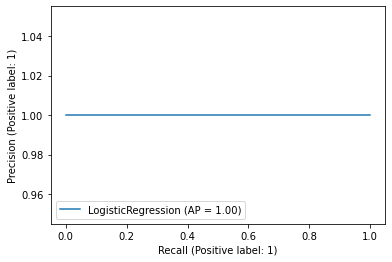

In [21]:
# Plots precision recall curve for different threshold values
metrics.plot_precision_recall_curve(clf, X_test, y_test)

ROC Curve

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])

In [28]:
fpr, tpr, thresholds

(array([0., 0., 0., 1.]),
 array([0. , 0.1, 1. , 1. ]),
 array([1.99839281, 0.99839281, 0.89589792, 0.00954442]))

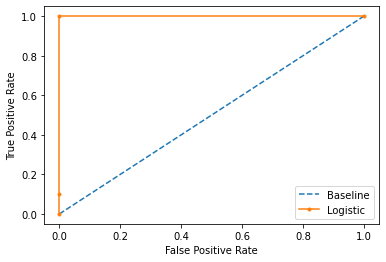

In [30]:
#Plot ROC curve
baseline_proba = [0 for _ in range(len(y_test))]
fpr_baseline, tpr_baseline, _ = metrics.roc_curve(y_test, baseline_proba)

# plot the roc curve for the model
plt.plot(fpr_baseline, tpr_baseline, linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()